# **Optimizing Candidate Selection Using Recruitment Data - Data Wrangling - Hector Sanchez**

In [1]:
# Let's start by loading the necessary libraries.

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# Create a file_path to load the dataset

file_path = 'C:/Users/hecsa/Springboard/Springboard Github/Springboard/Data Science Capstone Three/datasets/recruitment_data.csv'
recruitment_data = pd.read_csv(file_path)

Now that pandas has beeen imported and the recruitment_data has been loaded, we well call .info(), .head(), .descrcribe(), and .shape to get a better understanding of our dataset before we move forward.

In [5]:
# Display basic information regarding our dataset in the following 3 cells

recruitment_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1500 entries, 0 to 1499
Data columns (total 11 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  1500 non-null   int64  
 1   Gender               1500 non-null   int64  
 2   EducationLevel       1500 non-null   int64  
 3   ExperienceYears      1500 non-null   int64  
 4   PreviousCompanies    1500 non-null   int64  
 5   DistanceFromCompany  1500 non-null   float64
 6   InterviewScore       1500 non-null   int64  
 7   SkillScore           1500 non-null   int64  
 8   PersonalityScore     1500 non-null   int64  
 9   RecruitmentStrategy  1500 non-null   int64  
 10  HiringDecision       1500 non-null   int64  
dtypes: float64(1), int64(10)
memory usage: 129.0 KB


In [7]:
recruitment_data.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,1,2,0,3,26.783828,48,78,91,1,1
1,39,1,4,12,3,25.862694,35,68,80,2,1
2,48,0,2,3,2,9.920805,20,67,13,2,0
3,34,1,2,5,2,6.407751,36,27,70,3,0
4,30,0,1,6,1,43.105343,23,52,85,2,0


In [9]:
recruitment_data.describe()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
count,1500.000000,1500.000000,1500.000000,1500.000000,1500.00000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000,1500.000000
mean,35.148667,0.492000,2.188000,7.694000,3.00200,25.505379,50.564000,51.116000,49.387333,1.893333,0.310000
std,9.252728,0.500103,0.862449,4.641414,1.41067,14.567151,28.626215,29.353563,29.353201,0.689642,0.462647
min,20.000000,0.000000,1.000000,0.000000,1.00000,1.031376,0.000000,0.000000,0.000000,1.000000,0.000000
25%,27.000000,0.000000,2.000000,4.000000,2.00000,12.838851,25.000000,25.750000,23.000000,1.000000,0.000000
50%,35.000000,0.000000,2.000000,8.000000,3.00000,25.502239,52.000000,53.000000,49.000000,2.000000,0.000000
75%,43.000000,1.000000,3.000000,12.000000,4.00000,37.737996,75.000000,76.000000,76.000000,2.000000,1.000000
max,50.000000,1.000000,4.000000,15.000000,5.00000,50.992462,100.000000,100.000000,100.000000,3.000000,1.000000


In [11]:
recruitment_data.shape

(1500, 11)

Upon inspection, we now know that this dataset contains 1500 entries(rows) and 11 columns (all which have non-null values). I'll provide a summary of the columns found in this dataset in the cell below.

**Dataset Overview:**
    
    Columns:
        Age: Numeric(integer). Indicates a candidate's age.
        Gender: Binary (0 or 1). Indicates male or female.
        EducationLevel: Ordinal (0 to 4). Indicates amount of education acquired by a candidate.
        ExperienceYears: Numeric(integer). Displays a candidate's years of work experience.
        PreviousCompanies: Numeric(integer). Displays the number of companies that a candidate has worked at.
        DistanceFromCompany: Continuous(float). Shows the distance that the candidate lives from the company.
        InterviewScore, SkillScore, PersonalityScore: Display scores between 0-100 and are evaluation metrics for candidates.
        RecruitmentStrategy: Categorical (0 to 3). Represents the strategy that was used during a candidate's recruitment.
        HiringDecision: Binary (0 to 1). This is our target variable which indicates if the candidate was hired or not.

Our next step is to Assess the Quality of the Data. We will do this by doing the following:
   
    1. Checking for Missing Values
    2. Checking for Duplicates
    3. Checking for Possible Outliers

In [13]:
# Use .isnull().sum() to count the missing values in each column

missing_values = recruitment_data.isnull().sum()
print(missing_values)

Age                    0
Gender                 0
EducationLevel         0
ExperienceYears        0
PreviousCompanies      0
DistanceFromCompany    0
InterviewScore         0
SkillScore             0
PersonalityScore       0
RecruitmentStrategy    0
HiringDecision         0
dtype: int64


In [15]:
# Use .duplicated() to identify any duplicate rows

duplicates = recruitment_data.duplicated().sum()
print(f"Number of duplicate rows: {duplicates}")

Number of duplicate rows: 0


We've determined that our dataset does not contain any null values, nor does it contain any duplicated rows. Next, we'll use seaborn to check for outliers via a boxplot.

<Axes: >

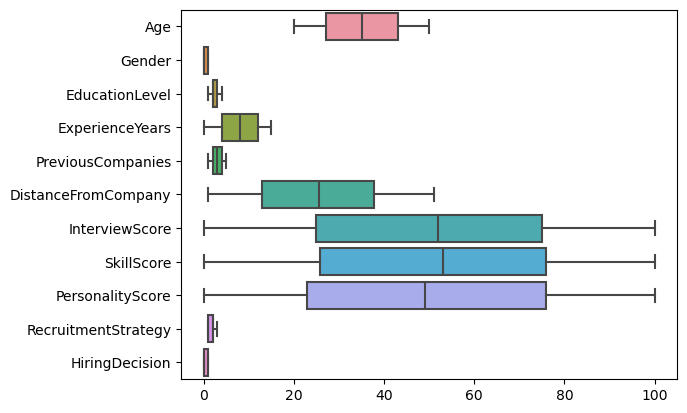

In [17]:
# Use seaborn to generate a boxplot that will help us identify any outliers

sns.boxplot(data=recruitment_data, orient='h')

Now I will apply code mapping to the Gender and EducuatonLevel columns in order to make them easier to interpret for others (and myself in the future). 
We will apply the following code mappings:

    Gender: Convert 0 and 1 to "Male" and "Female"
    EducationLevel: Apply a descriptive label to each level such as "High School", "Associate", "Bachelor's", "Master's", "Doctorate"

In [19]:
# Utilize code to Map Gender and EducationLevel

# First we'll map gender

gender_map = {0: 'Male', 1: 'Female'}
recruitment_data['Gender'] = recruitment_data['Gender'].map(gender_map)

# Next, we'll map EducationLevel

education_level_map = {
    1: 'Bachelor\'s Type 1',
    2: 'Bachelor\'s Type 2',
    3: 'Master\'s',
    4: 'PhD'
}
recruitment_data['EducationLevel'] = recruitment_data['EducationLevel'].map(education_level_map)

# Verify that the changes have been meade by calling .head()
recruitment_data.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,RecruitmentStrategy,HiringDecision
0,26,Female,Bachelor's Type 2,0,3,26.783828,48,78,91,1,1
1,39,Female,PhD,12,3,25.862694,35,68,80,2,1
2,48,Male,Bachelor's Type 2,3,2,9.920805,20,67,13,2,0
3,34,Female,Bachelor's Type 2,5,2,6.407751,36,27,70,3,0
4,30,Male,Bachelor's Type 1,6,1,43.105343,23,52,85,2,0


The next step is to one hot encode RecruitmentStrategy since it is the only Categorical variable/column in the dataset. This will help prepare the dataset for modeling in future steps. 

In order to One Hot Encode RecruitmentStrategy we will:

    1. Apply one hot encoding to RecruitmentStrategy which will create separate binary columns for each unique category. Doing this will convert  RecruitmentStategy into columsn like Strategy_0, Strategy_1, and Strategy_3. 
    2. We will apply code mapping to RecruitmentStrategy after one hot encoding to further clarify the difference between each recruitment strategy. Based on the Dataset Overview, 1 = Aggressive, 2 = Moderate, and 3 = Conservative. We will use and f string and a list comprehension to update Recruitment Strategy only and apply the suffixes after one hot encoding. 
    2.  Verify the changes by calling .head() to ensure that the dclumns were encoded correctly and that no extra columns were added.

In [21]:
# Utilize code to map RecruitmentStrategy.

recruitment_strategy_map = {1: 'Aggressive', 2: 'Moderate', 3: 'Conservative'}

In [23]:
# Use pd.get_dummies() to apply one hot coding

encoded_recruitment_data = pd.get_dummies(recruitment_data, columns=['RecruitmentStrategy'], prefix='Strategy')

# Use the recruitment_strategy_map to update the columns so that we can include suffixes.

encoded_recruitment_data.columns = [f"Strategy_{recruitment_strategy_map[int(col.split('_')[-1])]}" if col.startswith("Strategy_") else col 
    for col in encoded_recruitment_data.columns]

In [25]:
# Verify the changes by calling .head()

encoded_recruitment_data.head()

,Age,Gender,EducationLevel,ExperienceYears,PreviousCompanies,DistanceFromCompany,InterviewScore,SkillScore,PersonalityScore,HiringDecision,Strategy_Aggressive,Strategy_Moderate,Strategy_Conservative
0,26,Female,Bachelor's Type 2,0,3,26.783828,48,78,91,1,True,False,False
1,39,Female,PhD,12,3,25.862694,35,68,80,1,False,True,False
2,48,Male,Bachelor's Type 2,3,2,9.920805,20,67,13,0,False,True,False
3,34,Female,Bachelor's Type 2,5,2,6.407751,36,27,70,0,False,False,True
4,30,Male,Bachelor's Type 1,6,1,43.105343,23,52,85,0,False,True,False


Now that we applied One Hot Encoding, we will finalize and save out wrangled dataset.

In [27]:
recruitment_data.to_csv('cleaned_encoded_recruitment_data.csv', index=False)